КИЇВСЬКИЙ НАЦІОНАЛЬНИЙ УНІВЕРСИТЕТ
ІМЕНІ ТАРАСА ШЕВЧЕНКА


ФАКУЛЬТЕТ ІНФОРМАЦІЙНИХ ТЕХНОЛОГІЙ
КАФЕДРА ІНТЕЛЕКТУАЛЬНИХ ТЕХНОЛОГІЙ




Лабораторна робота № 2

з дисципліни «Розпізнавання образів »

Тема роботи: «методи розділяючих функцій»

Варіант 13



Виконала студентка:
групи AнД-31
Чуфістова П.О.


Перевірив:
Білан С.М.



Київ – 2023







Мета роботи:
- вивчити непараметричні методи «навчання з учителем», засновані на лінійних розділяючих функціях і методику побудови кусково-лінійних вирішальних правил; 
- отримати навички статистичного оцінювання показників якості класифікації з використанням системи MathCAD для моделювання та представлення об'єктів у вигляді даних спостережень


Завдання для виконання роботи 

1. За заданим (відповідно до варіанту) двовимірним даними спостережень ξi = (xi, yi) двох класів об'єктів a1 і a2 за правилом найближчого сусіда провести кордону між класами: - за вибірковими значеннями - границя g1(x, y) = 0; - по вибірковим середнім - границя g2(x, y) = 0. 
2. Побудувати вирішальні правила g1 і g2. 
3. Згенерувати масиви N даних спостережень (N = 100) класів a1 і a2 в припущенні, що спостерігається двовимірний випадковий вектор, компоненти якого - некорельовані нормально розподілені величини. Як параметри розподілів класів a1 і a2 ( і відповідно) взяти їх статистичні оцінки, отримані за заданими вихідними даними. 
4. Змоделювати процеси розпізнавання спостережень за вирішальними правилами g1 і g2 і порівняти ефективності класифікаторів з емпіричними оцінками ймовірностей правильних рішень. 
5. Оформити звіт про лабораторну роботу, який повинен містити короткі теоретичні відомості, алгоритми моделювання даних і прийняття рішень, графічні подання реалізацій спостережень і границь між класами, висновки.


Хід виконання роботи


1.Завантаження певних бібліотек для полегшення реалізації програмного коду

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import Eq, symbols, solve

Вхідні дані

In [31]:

do = pd.DataFrame({'x': [[0, 5.5, 2], [0.5, 1.5, 3]], 'y': [[0, 2.5, 2],[3,6, 4.5]]}).set_axis(['a1', 'a2'])
do = do.T
print(do)



            a1             a2
x  [0, 5.5, 2]  [0.5, 1.5, 3]
y  [0, 2.5, 2]    [3, 6, 4.5]


In [33]:
# Вихідні дані для класу a1
class_a1 = [(x, y) for (x, y) in [(0, 0),(5.5, 2.5), (2,2)]]

# Вихідні дані для класу a2
class_a2 = [(x, y) for (x, y) in [(0.5, 3),(1.5, 6), (3, 4.5)]]


print(f" a1: {class_a1}")
print(f" a1: {class_a2}")

 a1: [(0, 0), (5.5, 2.5), (2, 2)]
 a1: [(0.5, 3), (1.5, 6), (3, 4.5)]


Зоображення на графіку заданих точок класу_1 та класу_2

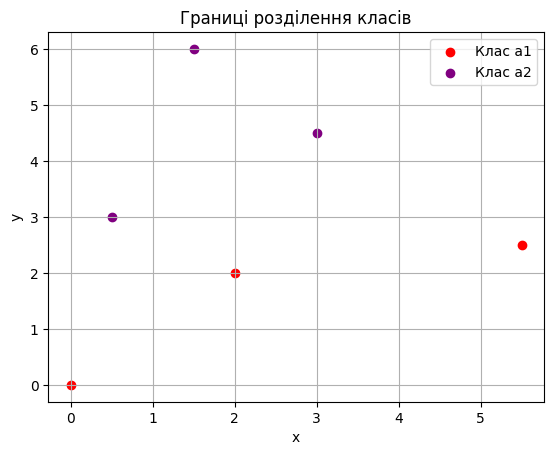

In [34]:

# Відокремлюємо координати x і y для обох класів
x_a1, y_a1 = zip(*class_a1)
x_a2, y_a2 = zip(*class_a2)

# Зобразимо точки для класу a1 зі своїми маркерами
plt.scatter(x_a1, y_a1, label='Клас a1', marker='o', color='red')

# Зобразимо точки для класу a2 зі своїми маркерами
plt.scatter(x_a2, y_a2, label='Клас a2', marker='o', color='purple')

# Додамо підписи до осей та легенду
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Границі розділення класів')
plt.show()
# Відображення графіку
plt.show()


Шукаємо середню точку відрізка з найближчими координатами

In [48]:
# Координати точки ξ1
x1, y1 = (0,0)  

# Координати точки ξ3
x3, y3 = (2, 2)  

# Знаходимо координати середини відрізка [ξ1, ξ4]
M1_x = (x1 + x3) / 2
M1_y = (y1 + y3) / 2

# Виводимо координати точки M1
print(f'Координати точки M1: ({M1_x}, {M1_y})')

Координати точки M1: (1.0, 1.0)


Знайдемо pівняння нормалі G1:

In [49]:
# Знайдемо вектор, що вказує вздовж відрізка між точками ξ1 і ξ3. Це можна зробити, 
# віднімаючи координати ξ1 від координат ξ3:
V = (x3 - x1, y3 - y1)

# Знайдемо вектор, який перпендикулярний до вектора V
M1_x, M1_y = (1, 1)  
N = (-V[1], V[0])  # Вектор нормалі до відрізка між ξ1 і ξ3

# Рівняння нормалі
print(f'Рівняння нормалі: {N[0]}(x - {M1_x}) = {N[1]}(y - {M1_y})')

Рівняння нормалі: -2(x - 1) = 2(y - 1)


In [50]:
# Рівняння нормалі: -2(x - 1) = 2(y - 1) (g1)
print("'G1(x,y)' Pівняння описує лінію, яка розділяє точки ξ1 і ξ3 на два класи:\ny - 2+x =0")

'G1(x,y)' Pівняння описує лінію, яка розділяє точки ξ1 і ξ4 на два класи:
y - 2+x =0


Знайдемо pівняння нормалі G2:

In [59]:
x2=5.5
y2=2.5

# Знайдемо вектор, що вказує вздовж відрізка між точками ξ2 і ξ4. Це можна зробити, 
# віднімаючи координати ξ2 від координат ξ4:
V_2 = (x3 - x2, y3 - y2)

# Знайдемо вектор, який перпендикулярний до вектора V
M2_x, M2_y = ((x2 + x3) / 2,(y2+y3)/2)  
N_2 = (-V_2[1], V_2[0])  # Вектор нормалі до відрізка між ξ1 і ξ4

# Рівняння нормалі
print(f'Рівняння нормалі: {N_2[0]}(x - {M2_x}) = {N_2[1]}(y - {M2_y})')

Рівняння нормалі: 0.5(x - 3.75) = -3.5(y - 2.25)


In [60]:
# Рівняння нормалі: 0.5(x - 3.75) = -3.5(y - 2.25) (g2)
print("'G2(x,y)' Pівняння описує лінію, яка розділяє точки ξ2 і ξ3 на два класи:\n(-0.143)*(x-3.75)-y+2.25=0")

'G2(x,y)' Pівняння описує лінію, яка розділяє точки ξ2 і ξ3 на два класи:
(-0.143)*(x-3.75)-y+2.25=0


 Точка перетину ліній g1(x, y) = 0 і g2(x, y) = 0 - це точка зламу S1 кусочно-лінійної границі
g1(x, y) = 0 між класами a1 і a2; координати цієї точки знаходимо з вирішення системи рівнянь:

G1=> y - 2+x=0

G2 => (-0.143)*(x-3.75)-y+2.25= 0

In [61]:
x, y = symbols('x y')


eq1 = Eq(y - 2+x, 0)
eq2 = Eq((-0.143)*(x-3.75)-y+2.25, 0)

# Розв'язання системи рівнянь
solution = solve((eq1, eq2), (x, y))
rounded_solution = {x: round(solution[x], 1), y: round(solution[y], 1)}

print("Тодi S1:")
print(rounded_solution )

Тодi S1:
{x: -0.9, y: 2.9}


Побудуємо січну, що проходить через точку S1

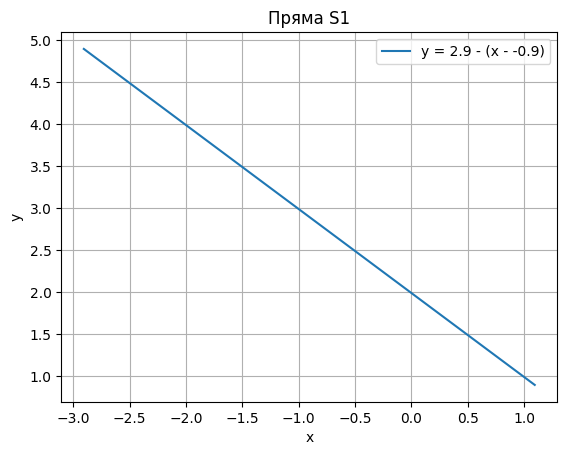

In [62]:
# Значення x та y з rounded_solution
x_value = rounded_solution[x]
y_value = rounded_solution[y]

# Діапазон значень x для графіку
x_values = [x_value - 2, x_value + 2] 

# Обчислення відповідних значень y
y_values = [y_value - (x - x_value) for x in x_values]


plt.plot(x_values, y_values, label=f'y = {y_value} - (x - {x_value})')


plt.xlabel('x')
plt.ylabel('y')
plt.title("Пряма S1")
plt.legend()
plt.grid(True)
plt.show()


1) Аналогічним чином знаходимо рівняння ліній, що розділяють інші пари точок, і
координати точок зламу Sk(xk, yk) границі g1(x, y) = 0.
2) Знайдемо рівняння границі g2 між класами a1 і a2 після усереднення даних спостережень.
3) озташування даних, їх середніх значень (→𝑚1 і →𝑚2) і межа між класами показані  на графіку:

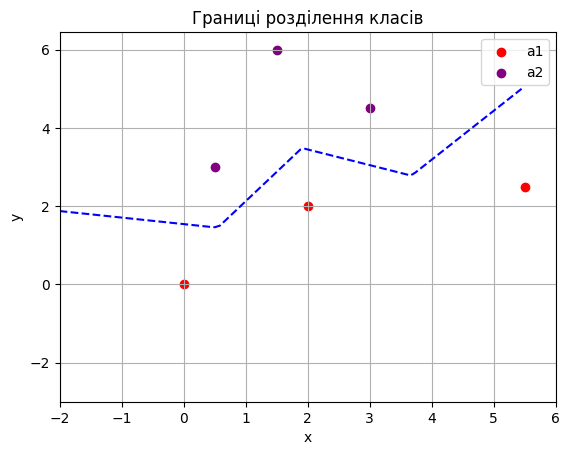

In [63]:
a1 = np.array([(0, 0),(5.5, 2.5), (2,2)])      
a2 = np.array([(0.5, 3),(1.5, 6), (3, 4.5)])

def g1(x, y):
    point = np.array([x, y])
    dis_to_a1 = np.min(np.linalg.norm(a1 - point, axis=1))
    dis_to_a2 = np.min(np.linalg.norm(a2 - point, axis=1))
    return dis_to_a1 - dis_to_a2

x = np.linspace(-2, 6, 100)
y = np.linspace(-3, 5, 100)
x, y = np.meshgrid(x, y)
z1 = np.vectorize(g1)(x, y)


plt.contour(x, y, z1, levels=[0], colors='blue', linestyles='dashed')

plt.scatter(a1[:, 0], a1[:, 1], color='r', label='a1')
plt.scatter(a2[:, 0], a2[:, 1], color='purple', label='a2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Границі розділення класів')
plt.show()


1) Для експериментальної перевірки якості роботи класифікаторів за правилами  і змоделюємо результати спостережень - масиви ({x1i}; {y1i}) і ({x2i}; {y2i}), відповідні
класам a1 і a2.
2) В результаті отримаємо масив ai, елементи якого дорівнюють або 1 (якщо прийнято
рішення γ1), або 2 (якщо прийнято рішення γ2). Оскільки розпізнав клас a1, то γ1 - правильне
рішення, γ2 - помилкове.



In [74]:
def classify1(xy):
    a1_correct, a2_correct = 0, 0
    mod = len(xy) // 2  # Use integer division

    for (x, y) in xy:
        if -0.5<y<3:
            a1_correct += 1 
        else:
            a2_correct += 1
# Визначимо емпіричну ймовірність правильного розпізнавання класу a1 як відношення
# кількості правильних рішень до об'єму випробувань mod

    a1_percentage = (a1_correct / mod) * 100
    a2_percentage = (a2_correct / mod) * 100

    return a1_percentage, a2_percentage

a = [(0, 0),(1.5, 6), (2,2),(0.5, 3),(5.5, 2.5), (3, 4.5)]

ad1, ad2 = classify1(a)


print(f'Percentage of a1: {ad1:.2f}%')
print(f'Percentage of a2: {ad2:.2f}%')



Percentage of a1: 100.00%
Percentage of a2: 100.00%


1) Визначимо функцію користувача, яка здійснює алгоритм генерації масиву реалізацій
нормально розподіленої випадкової величини.
2) Формальними аргументами цієї функції є номери елементів z масиву реалізацій і
параметри нормального розподілу МО m і СКВ σ моделюється випадкової величини.
Отримаємо 100 даних спостережень класу a1
3) Аналогічним чином згенеруємо 100 даних спостережень класу a2: x2i і y2i.
4) Побудуємо графічне зображення даних
5) емпірична ймовірність помилкового розпізнавання

87.0 %
113.0 %
емпірична ймовірність помилкового розпізнавання: 0.13


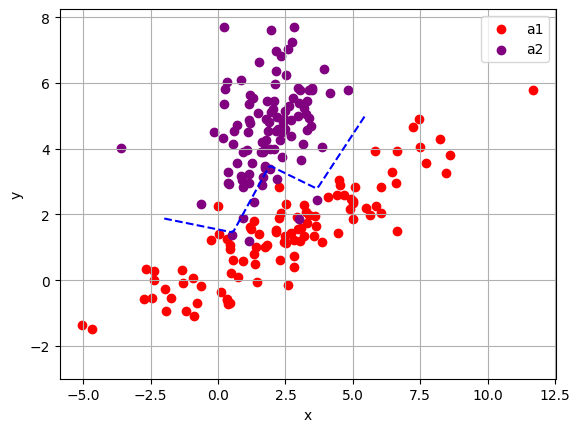

In [72]:
a1_mean=np.mean(a1,axis=0)
a2_mean=np.mean(a2,axis=0)
N=100
mu_a1,sigma_a1 =a1_mean,np.cov(a1, rowvar=False)
mu_a2,sigma_a2 =a2_mean,np.cov(a2, rowvar=False)

a1_data=np.random.multivariate_normal(mu_a1, sigma_a1,N)
a2_data=np.random.multivariate_normal(mu_a2, sigma_a2,N)

a_data=a1_data.tolist()+a2_data.tolist()
ad1, ad2 = classify1(a_data)
print (round(ad1 / len(a1_data) * 100,1), '%')
print (round(ad2 / len(a2_data) * 100,1), '%')

P11=(ad1/100)
P12=1-P11


print(f"емпірична ймовірність помилкового розпізнавання: {P12}")

plt.contour(x, y, z1, levels=[0], colors='blue', linestyles='dashed')

plt.scatter(a1_data[:, 0], a1_data[:, 1], color='r', label='a1')
plt.scatter(a2_data[:, 0], a2_data[:, 1], color='purple', label='a2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



Проведемо розпізнавання контрольної вибірки ({xi}; {yi}) по вирішального правилу

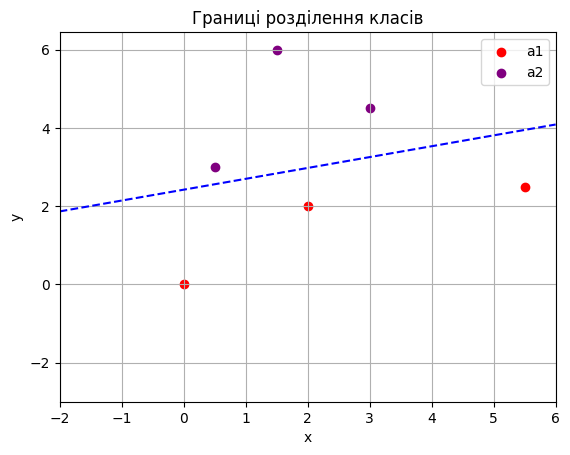

In [46]:
mean_a1=np.mean(a1,axis=0)
mean_a2=np.mean(a2,axis=0)

def g2(x, y):
    point = np.array([x, y])
    dis_to_mean_a1 = np.linalg.norm( point-mean_a1)
    dis_to_mean_a2 = np.linalg.norm( point-mean_a2)
    return dis_to_mean_a1 - dis_to_mean_a2


z2 = np.vectorize(g2)(x, y)

plt.contour(x, y, z2, levels=[0], colors='blue', linestyles='dashed')

plt.scatter(a1[:, 0], a1[:, 1], color='r', label='a1')
plt.scatter(a2[:, 0], a2[:, 1], color='purple', label='a2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Границі розділення класів')
plt.show()

Оцінимо ймовірності Ρ21 і Ρ21

94.0 %
100.0 %
емпірична ймовірність помилкового розпізнавання: 0.06000000000000005


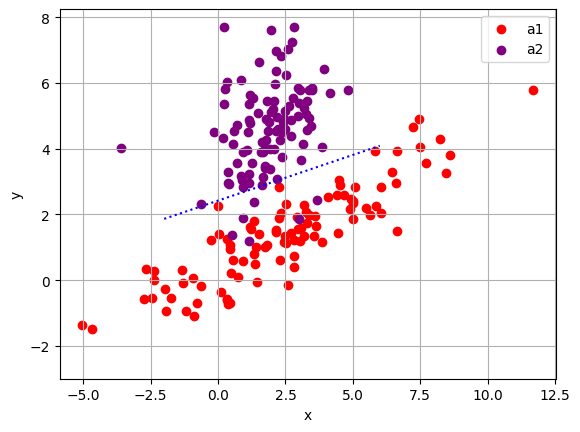

In [81]:

def classify2(xy):
    ad1, ad2,i = 0, 0, 0
    mod = len(xy) // 2  # Use integer division

    for (x, y) in xy:
        if y > round(0.27*x+2.4, 1) and i>=mod :ad1+=1
        elif i<=mod:ad2+=1
        i+=1
    return ad1,ad2    

ad1, ad2 = classify2(a_data)
print (ad1 / len(a1_data) * 100, '%')
print (ad2 / len(a2_data) * 100, '%')

P21=ad1 / 100
P22=1-P21


print(f"емпірична ймовірність помилкового розпізнавання: {P22}")

plt.contour(x, y, z2, levels=[0], colors='blue', linestyles='dotted')

plt.scatter(a1_data[:, 0], a1_data[:, 1], color='r', label='a1')
plt.scatter(a2_data[:, 0], a2_data[:, 1], color='purple', label='a2')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



Висновок:

У ході данної лабораторної роботи, я дізналась та засвоїла непараметричні методи «навчання з учителем», засновані на лінійних
розділяючих функціях і методику побудови кусково-лінійних вирішальних правил; 
А також отримала навички статистичного оцінювання показників якості класифікації з
використанням мови програмування python для моделювання та представлення об'єктів у вигляді даних спостережень